In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
data_dir = 'data1' 

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
import imghdr

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

C:\Users\inest\AppData\Local\Temp\ipykernel_11672\462545489.py:1: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data1')

Found 305 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

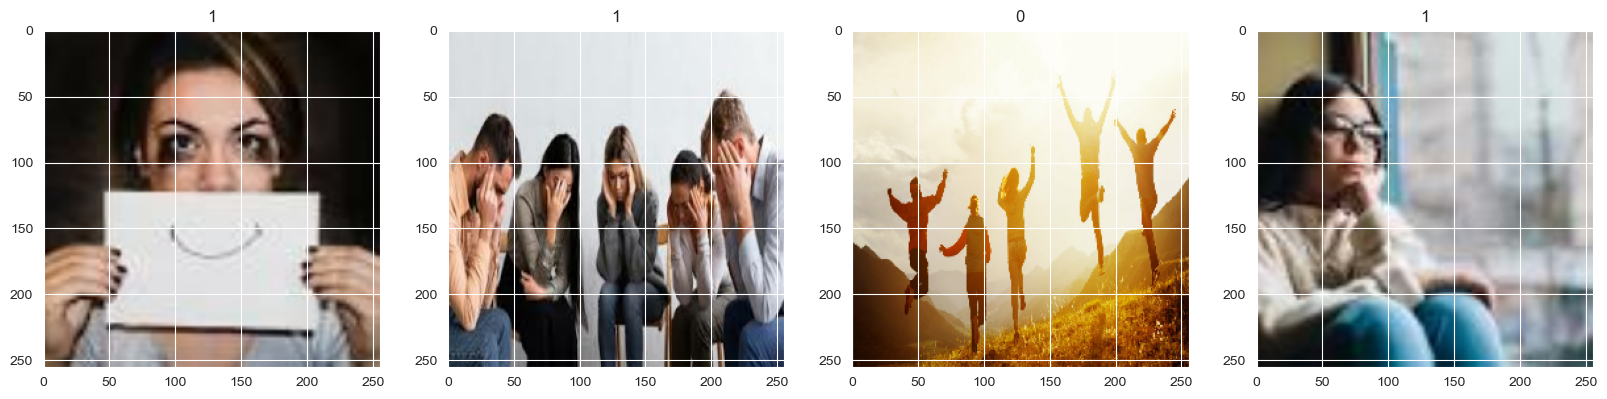

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [12]:
data = data.map(lambda x,y: (x/255, y))

In [13]:
data.as_numpy_iterator().next()

(array([[[[0.9764706 , 1.        , 0.972549  ],
          [0.9764706 , 1.        , 0.972549  ],
          [0.9764706 , 1.        , 0.972549  ],
          ...,
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686]],
 
         [[0.9761336 , 1.        , 0.972212  ],
          [0.9761336 , 1.        , 0.972212  ],
          [0.9761336 , 1.        , 0.972212  ],
          ...,
          [0.9928309 , 0.9928309 , 0.9928309 ],
          [0.9928309 , 0.9928309 , 0.9928309 ],
          [0.9928309 , 0.9928309 , 0.9928309 ]],
 
         [[0.9746017 , 1.        , 0.9706801 ],
          [0.9746017 , 1.        , 0.9706801 ],
          [0.9746017 , 1.        , 0.9706801 ],
          ...,
          [0.9958946 , 0.9958946 , 0.9958946 ],
          [0.9958946 , 0.9958946 , 0.9958946 ],
          [0.9958946 , 0.9958946 , 0.9958946 ]],
 
         ...,
 
         [[0.0653799 , 0.07322304, 0.12420343],
          [0.06481

In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [15]:
train_size

7

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [17]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

ModuleNotFoundError: No module named 'tensorflow.keras'

In [21]:
from keras import Sequential

model = Sequential()

In [22]:
from keras.src.layers import Conv2D, MaxPooling2D, Flatten, Dense

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\inest\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 588ms/step - accuracy: 0.4727 - loss: 1.1915 - val_accuracy: 0.5781 - val_loss: 0.7043
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 378ms/step - accuracy: 0.5867 - loss: 0.6818 - val_accuracy: 0.4531 - val_loss: 0.6718
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 378ms/step - accuracy: 0.7065 - loss: 0.6189 - val_accuracy: 0.7031 - val_loss: 0.5931
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 374ms/step - accuracy: 0.6812 - loss: 0.6340 - val_accuracy: 0.5781 - val_loss: 0.5926
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 885ms/step - accuracy: 0.6764 - loss: 0.5374 - val_accuracy: 0.8906 - val_loss: 0.4512
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.8548 - loss: 0.4209 - val_accuracy: 0.9219 - val_loss: 0.3490
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8921 - loss: 0.3662 - val_accuracy: 0.9219 - val_loss: 0.2701
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 302ms/step - accuracy: 0.9550 - loss: 0.2635 - val_accuracy: 0.9219 - val_loss: 0.2

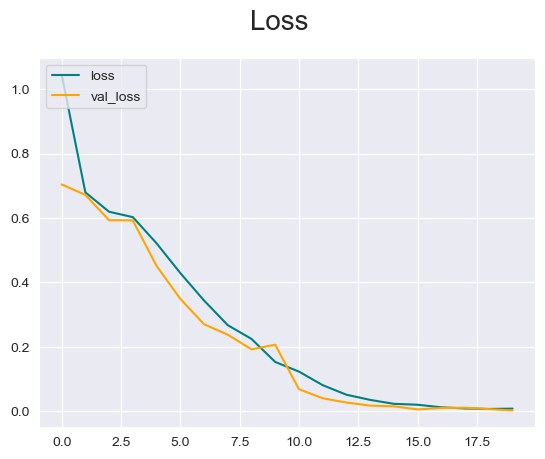

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

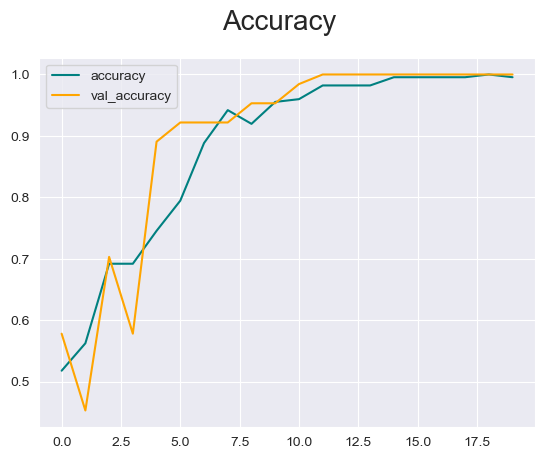

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [30]:
from keras.src.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [35]:
from tkinter import Image

img = Image.open('154006829.jpg')


plt.imshow(img)
plt.axis('off')  # Pour masquer les axes
plt.show()

AttributeError: type object 'Image' has no attribute 'open'

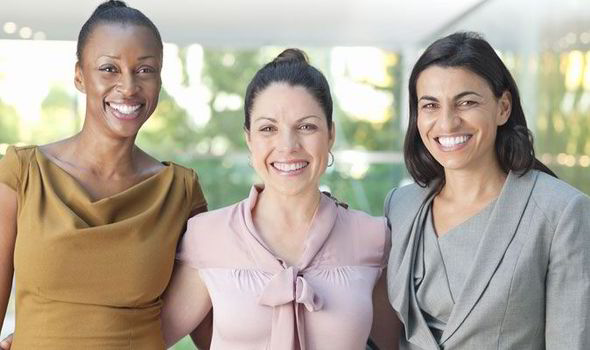

In [37]:
from IPython.display import Image
Image('data1/happy/1-2.jpg')



In [38]:
resize = tf.image.resize('data1/happy/1-2.jpg', (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

ValueError: 'images' must have either 3 or 4 dimensions.

In [39]:
img = Image.open('data1/happy/1-2.jpg')


AttributeError: type object 'Image' has no attribute 'open'

In [42]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


img = Image.open('data1/happy/1-2.jpg')  

In [43]:
img = np.array(img)

In [44]:
resize = tf.image.resize(img, (256, 256))

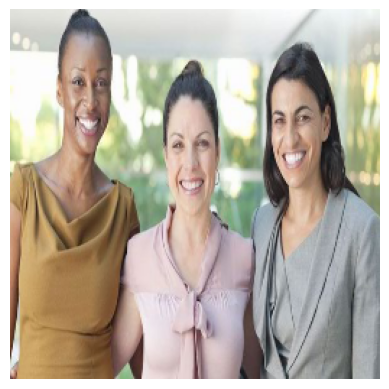

In [45]:
plt.imshow(resize.numpy().astype(int))
plt.axis('off')
plt.show()

In [46]:
yhat = model.predict(np.expand_dims(resize / 255.0, 0))
print(yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
[[0.00178422]]


In [47]:
if yhat > 0.5:
    print('Predicted class is Sad')
else:
    print('Predicted class is Happy')

Predicted class is Happy


In [48]:
img = Image.open('data1/sad/0x0.jpg')  

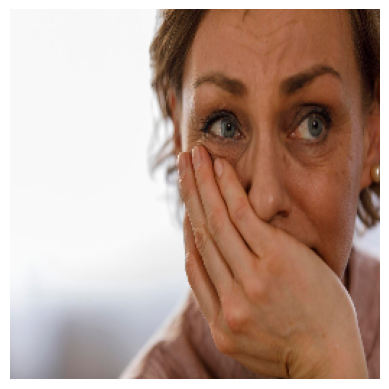

In [49]:
img = np.array(img)
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.axis('off')
plt.show()

In [50]:
yhat = model.predict(np.expand_dims(resize / 255.0, 0))
print(yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.9993064]]


In [51]:
if yhat > 0.5:
    print('Predicted class is Sad')
else:
    print('Predicted class is Happy')

Predicted class is Sad
